# Analysis of the vemurafenib trial

This notebook reproduces the analysis of the vemurafenib trial in the [RoBoT paper](https://academic.oup.com/biostatistics/article/22/4/897/5736525), but using simpler models.

In [1]:
%matplotlib inline

%load_ext autoreload
%autoreload 2

In [2]:
import sys
from os.path import exists

sys.path.append('..')
sys.path.append('.')

In [3]:
import numpy as np
import pandas as pd
import arviz as az

In [15]:
from pyBasket.env import Trial, EmpiricalSite
from pyBasket.common import DEFAULT_EFFICACY_CUTOFF, DEFAULT_FUTILITY_CUTOFF

In [5]:
DEBUG = True

In [6]:
num_burn_in = 1E5
num_posterior_samples = 1E5
num_chains = None # let pymc decide

In [7]:
if DEBUG:
    num_burn_in = 5E4
    num_posterior_samples = 5E4
    num_chains = 1

### Generate data

In [8]:
K = 6    # the number of groups
p0 = 0.15 # null response rate
p1 = 0.45 # target response rate

evaluate_interim = [True]
analysis_names = ['independent', 'hierarchical', 'bhm']

In [9]:
basket_info = [
    ['ATC', 2, 7],
    ['ECD/LC', 6, 14],
    ['CCA', 1, 8],
    ['CRC-V', 1, 26],
    ['CRC-V', 0, 10],
    ['NSCLC', 8, 19]
]

sites = [EmpiricalSite(b[0], b[1], b[2]) for b in basket_info]
sites

In [16]:
futility_cutoff = DEFAULT_FUTILITY_CUTOFF
efficacy_cutoff = DEFAULT_EFFICACY_CUTOFF
early_futility_stop = False
early_efficacy_stop = False

In [17]:
trial = Trial(K, p0, p1, sites, evaluate_interim, 
              num_burn_in, num_posterior_samples, analysis_names, 
              futility_cutoff=futility_cutoff, efficacy_cutoff=efficacy_cutoff,
              early_futility_stop=early_futility_stop,
              early_efficacy_stop=early_efficacy_stop,              
              num_chains=num_chains)

done = trial.reset()
while not done:
    done = trial.step()


########## Stage=0 ##########

Analysis independent Group 0 (OPEN): 2/7
Analysis hierarchical Group 0 (OPEN): 2/7
Analysis bhm Group 0 (OPEN): 2/7

Analysis independent Group 1 (OPEN): 6/14
Analysis hierarchical Group 1 (OPEN): 6/14
Analysis bhm Group 1 (OPEN): 6/14

Analysis independent Group 2 (OPEN): 1/8
Analysis hierarchical Group 2 (OPEN): 1/8
Analysis bhm Group 2 (OPEN): 1/8

Analysis independent Group 3 (OPEN): 1/26
Analysis hierarchical Group 3 (OPEN): 1/26
Analysis bhm Group 3 (OPEN): 1/26

Analysis independent Group 4 (OPEN): 0/10
Analysis hierarchical Group 4 (OPEN): 0/10
Analysis bhm Group 4 (OPEN): 0/10

Analysis independent Group 5 (OPEN): 8/19
Analysis hierarchical Group 5 (OPEN): 8/19
Analysis bhm Group 5 (OPEN): 8/19

Running inference for: independent


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [θ]


Sampling 1 chain for 50_000 tune and 50_000 draw iterations (50_000 + 50_000 draws total) took 49 seconds.


,prob,futile,effective
k,,,
0,0.89806,None,False
1,0.99658,None,True
2,0.60178,None,False
3,0.07304,None,False
4,0.16956,None,False
5,0.99868,None,True


Running inference for: hierarchical


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [α, β, θ]


Sampling 1 chain for 50_000 tune and 50_000 draw iterations (50_000 + 50_000 draws total) took 92 seconds.
There were 41 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.7104, but should be close to 0.8. Try to increase the number of tuning steps.


,prob,futile,effective
k,,,
0,0.86730,None,False
1,0.98862,None,True
2,0.68590,None,False
3,0.22072,None,False
4,0.40748,None,False
5,0.99514,None,True


Running inference for: bhm


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [tausq, theta0, e]


Sampling 1 chain for 50_000 tune and 50_000 draw iterations (50_000 + 50_000 draws total) took 90 seconds.


,prob,futile,effective
k,,,
0,0.82238,None,False
1,0.99348,None,True
2,0.42498,None,False
3,0.03256,None,False
4,0.05258,None,False
5,0.99776,None,True


### Check last results

### Independent

In [18]:
analysis_name = analysis_names[0]
analysis_name

'independent'

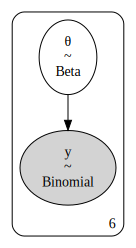

In [19]:
trial.visualise_model(analysis_name)

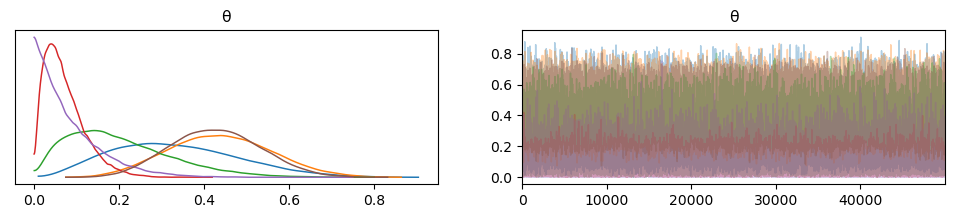

In [20]:
trial.plot_trace(analysis_name, -1)

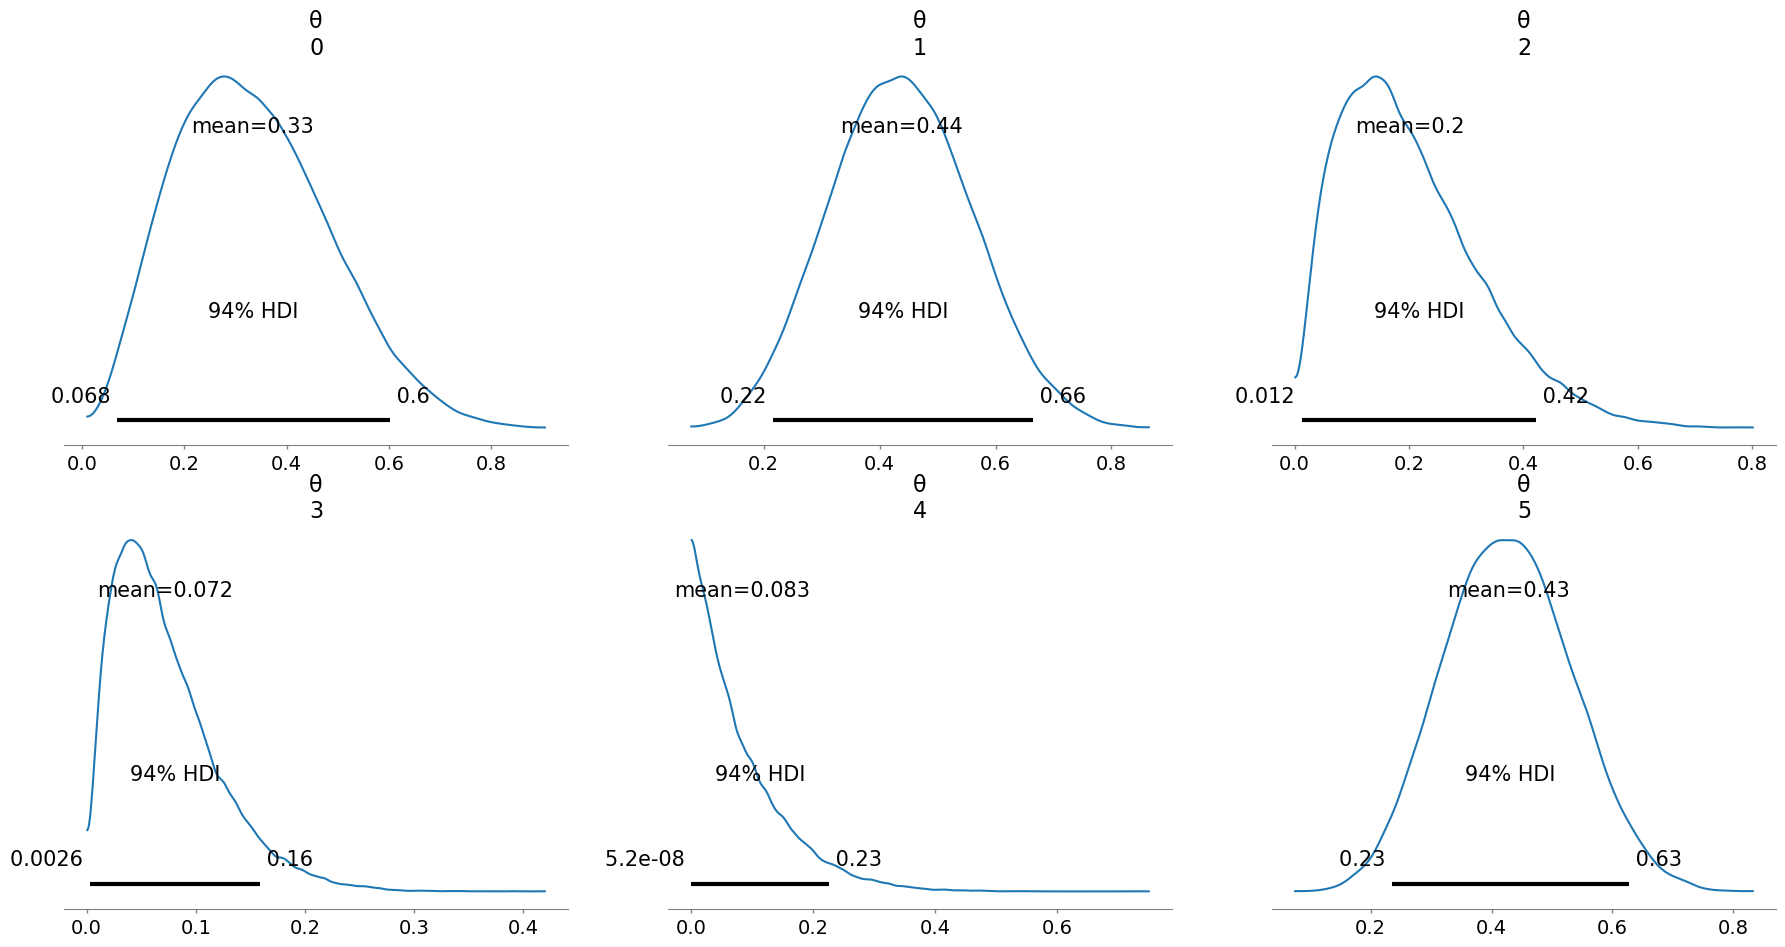

In [21]:
trial.plot_posterior(analysis_name, -1)

In [22]:
trial.final_report(analysis_name)

,status,nnz,total
k,,,
0,COMPLETED_INEFFECTIVE,2,7
1,COMPLETED_EFFECTIVE,6,14
2,COMPLETED_INEFFECTIVE,1,8
3,COMPLETED_INEFFECTIVE,1,26
4,COMPLETED_INEFFECTIVE,0,10
5,COMPLETED_EFFECTIVE,8,19


### Hierarchical

In [23]:
analysis_name = analysis_names[1]
analysis_name

'hierarchical'

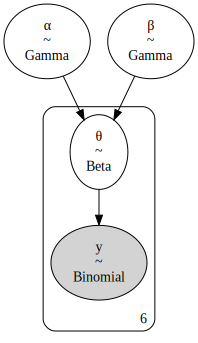

In [24]:
trial.visualise_model(analysis_name)

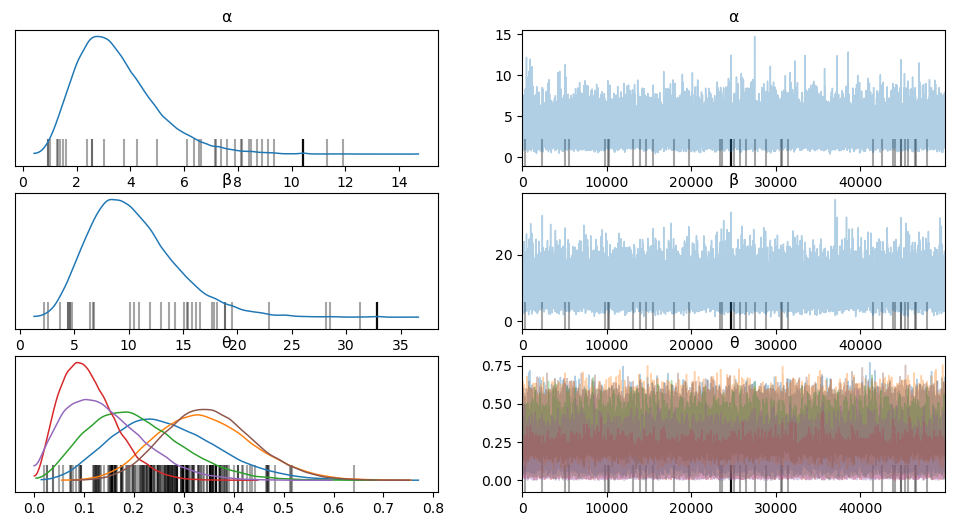

In [25]:
trial.plot_trace(analysis_name, -1)

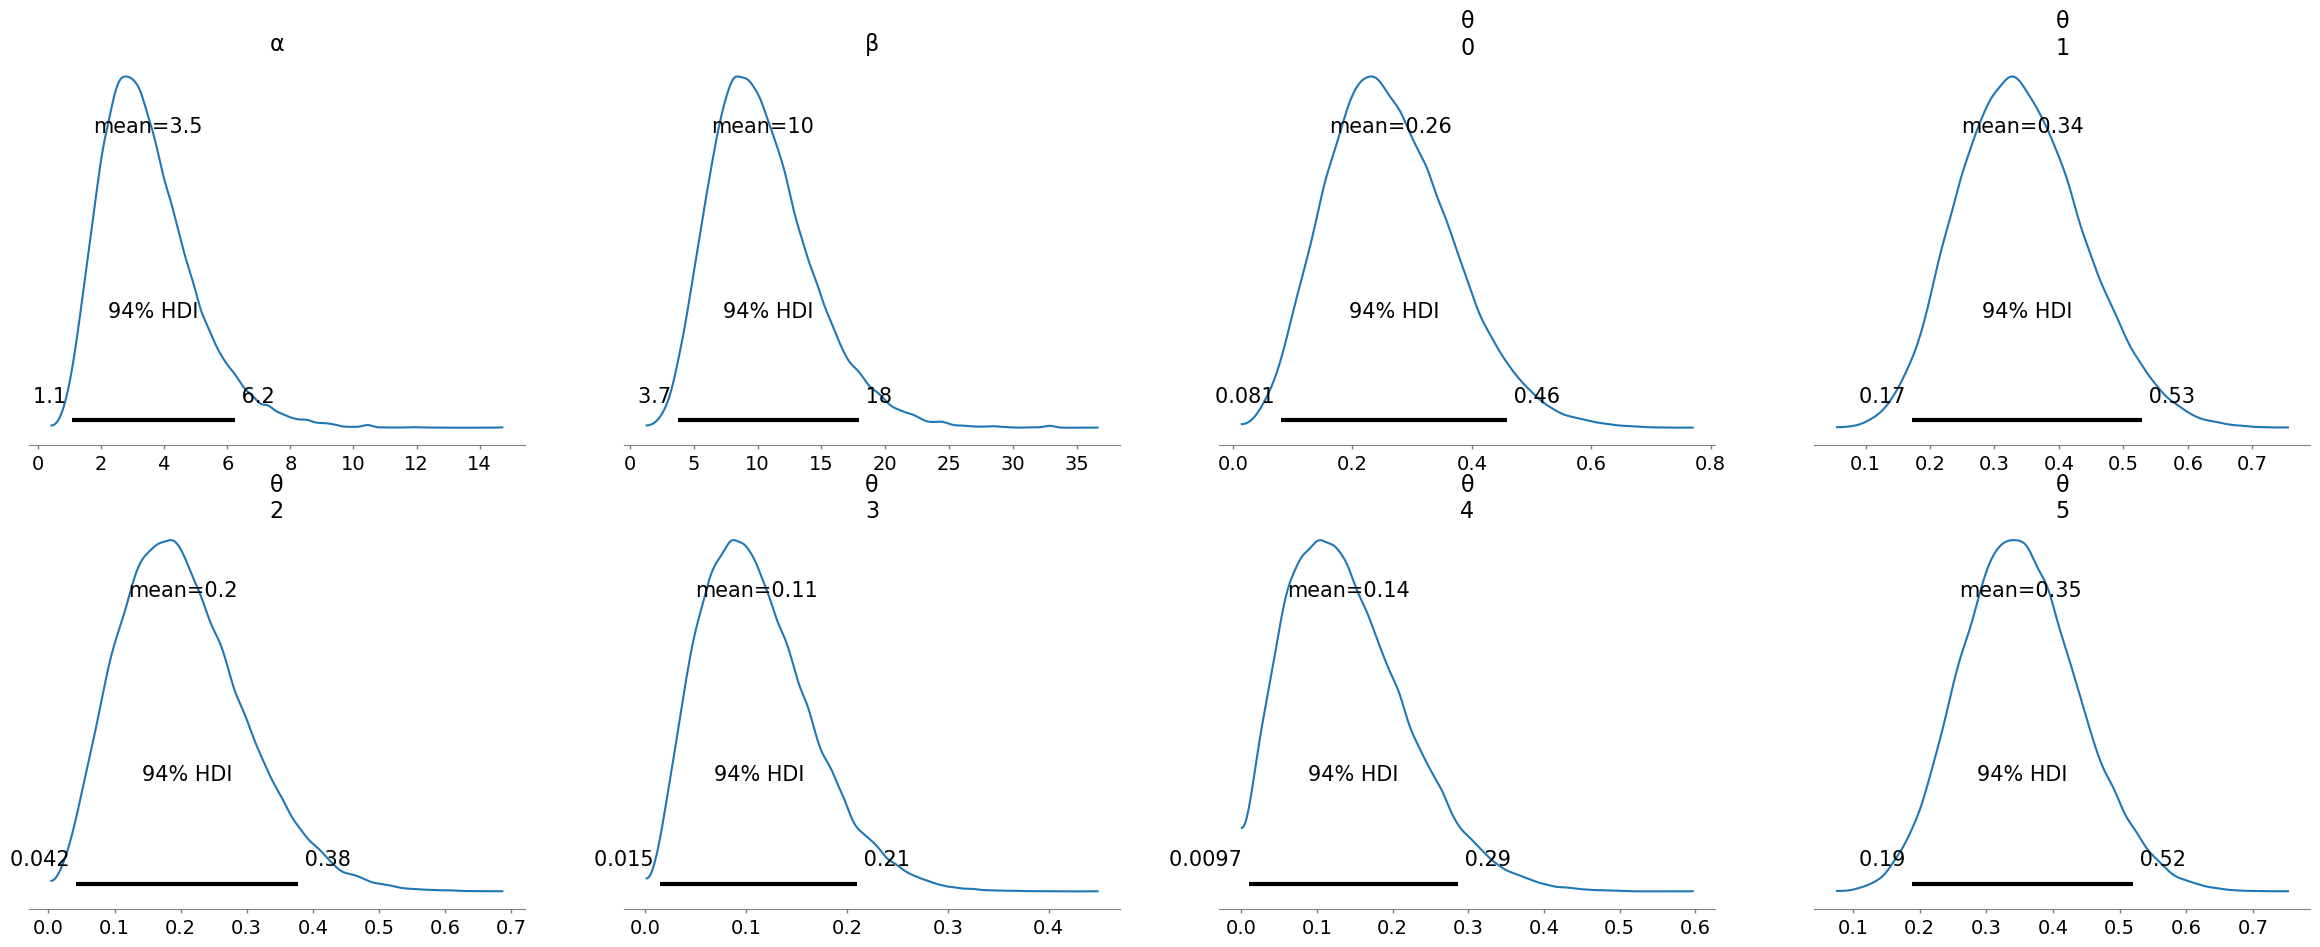

In [26]:
trial.plot_posterior(analysis_name, -1)

In [27]:
trial.final_report(analysis_name)

,status,nnz,total
k,,,
0,COMPLETED_INEFFECTIVE,2,7
1,COMPLETED_EFFECTIVE,6,14
2,COMPLETED_INEFFECTIVE,1,8
3,COMPLETED_INEFFECTIVE,1,26
4,COMPLETED_INEFFECTIVE,0,10
5,COMPLETED_EFFECTIVE,8,19


### BHM

In [28]:
analysis_name = analysis_names[2]
analysis_name

'bhm'

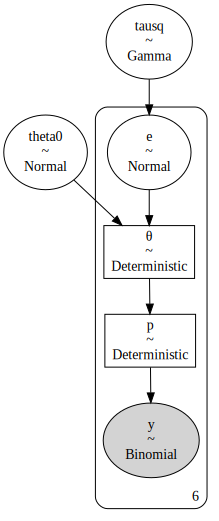

In [29]:
trial.visualise_model(analysis_name)

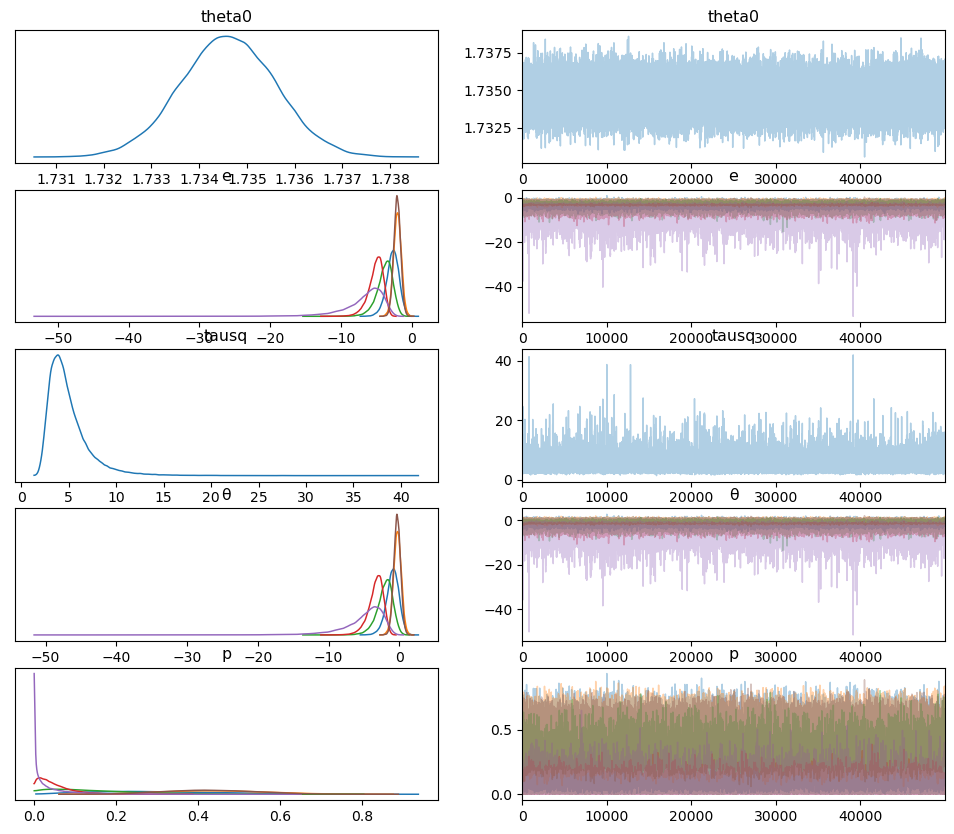

In [30]:
trial.plot_trace(analysis_name, -1)

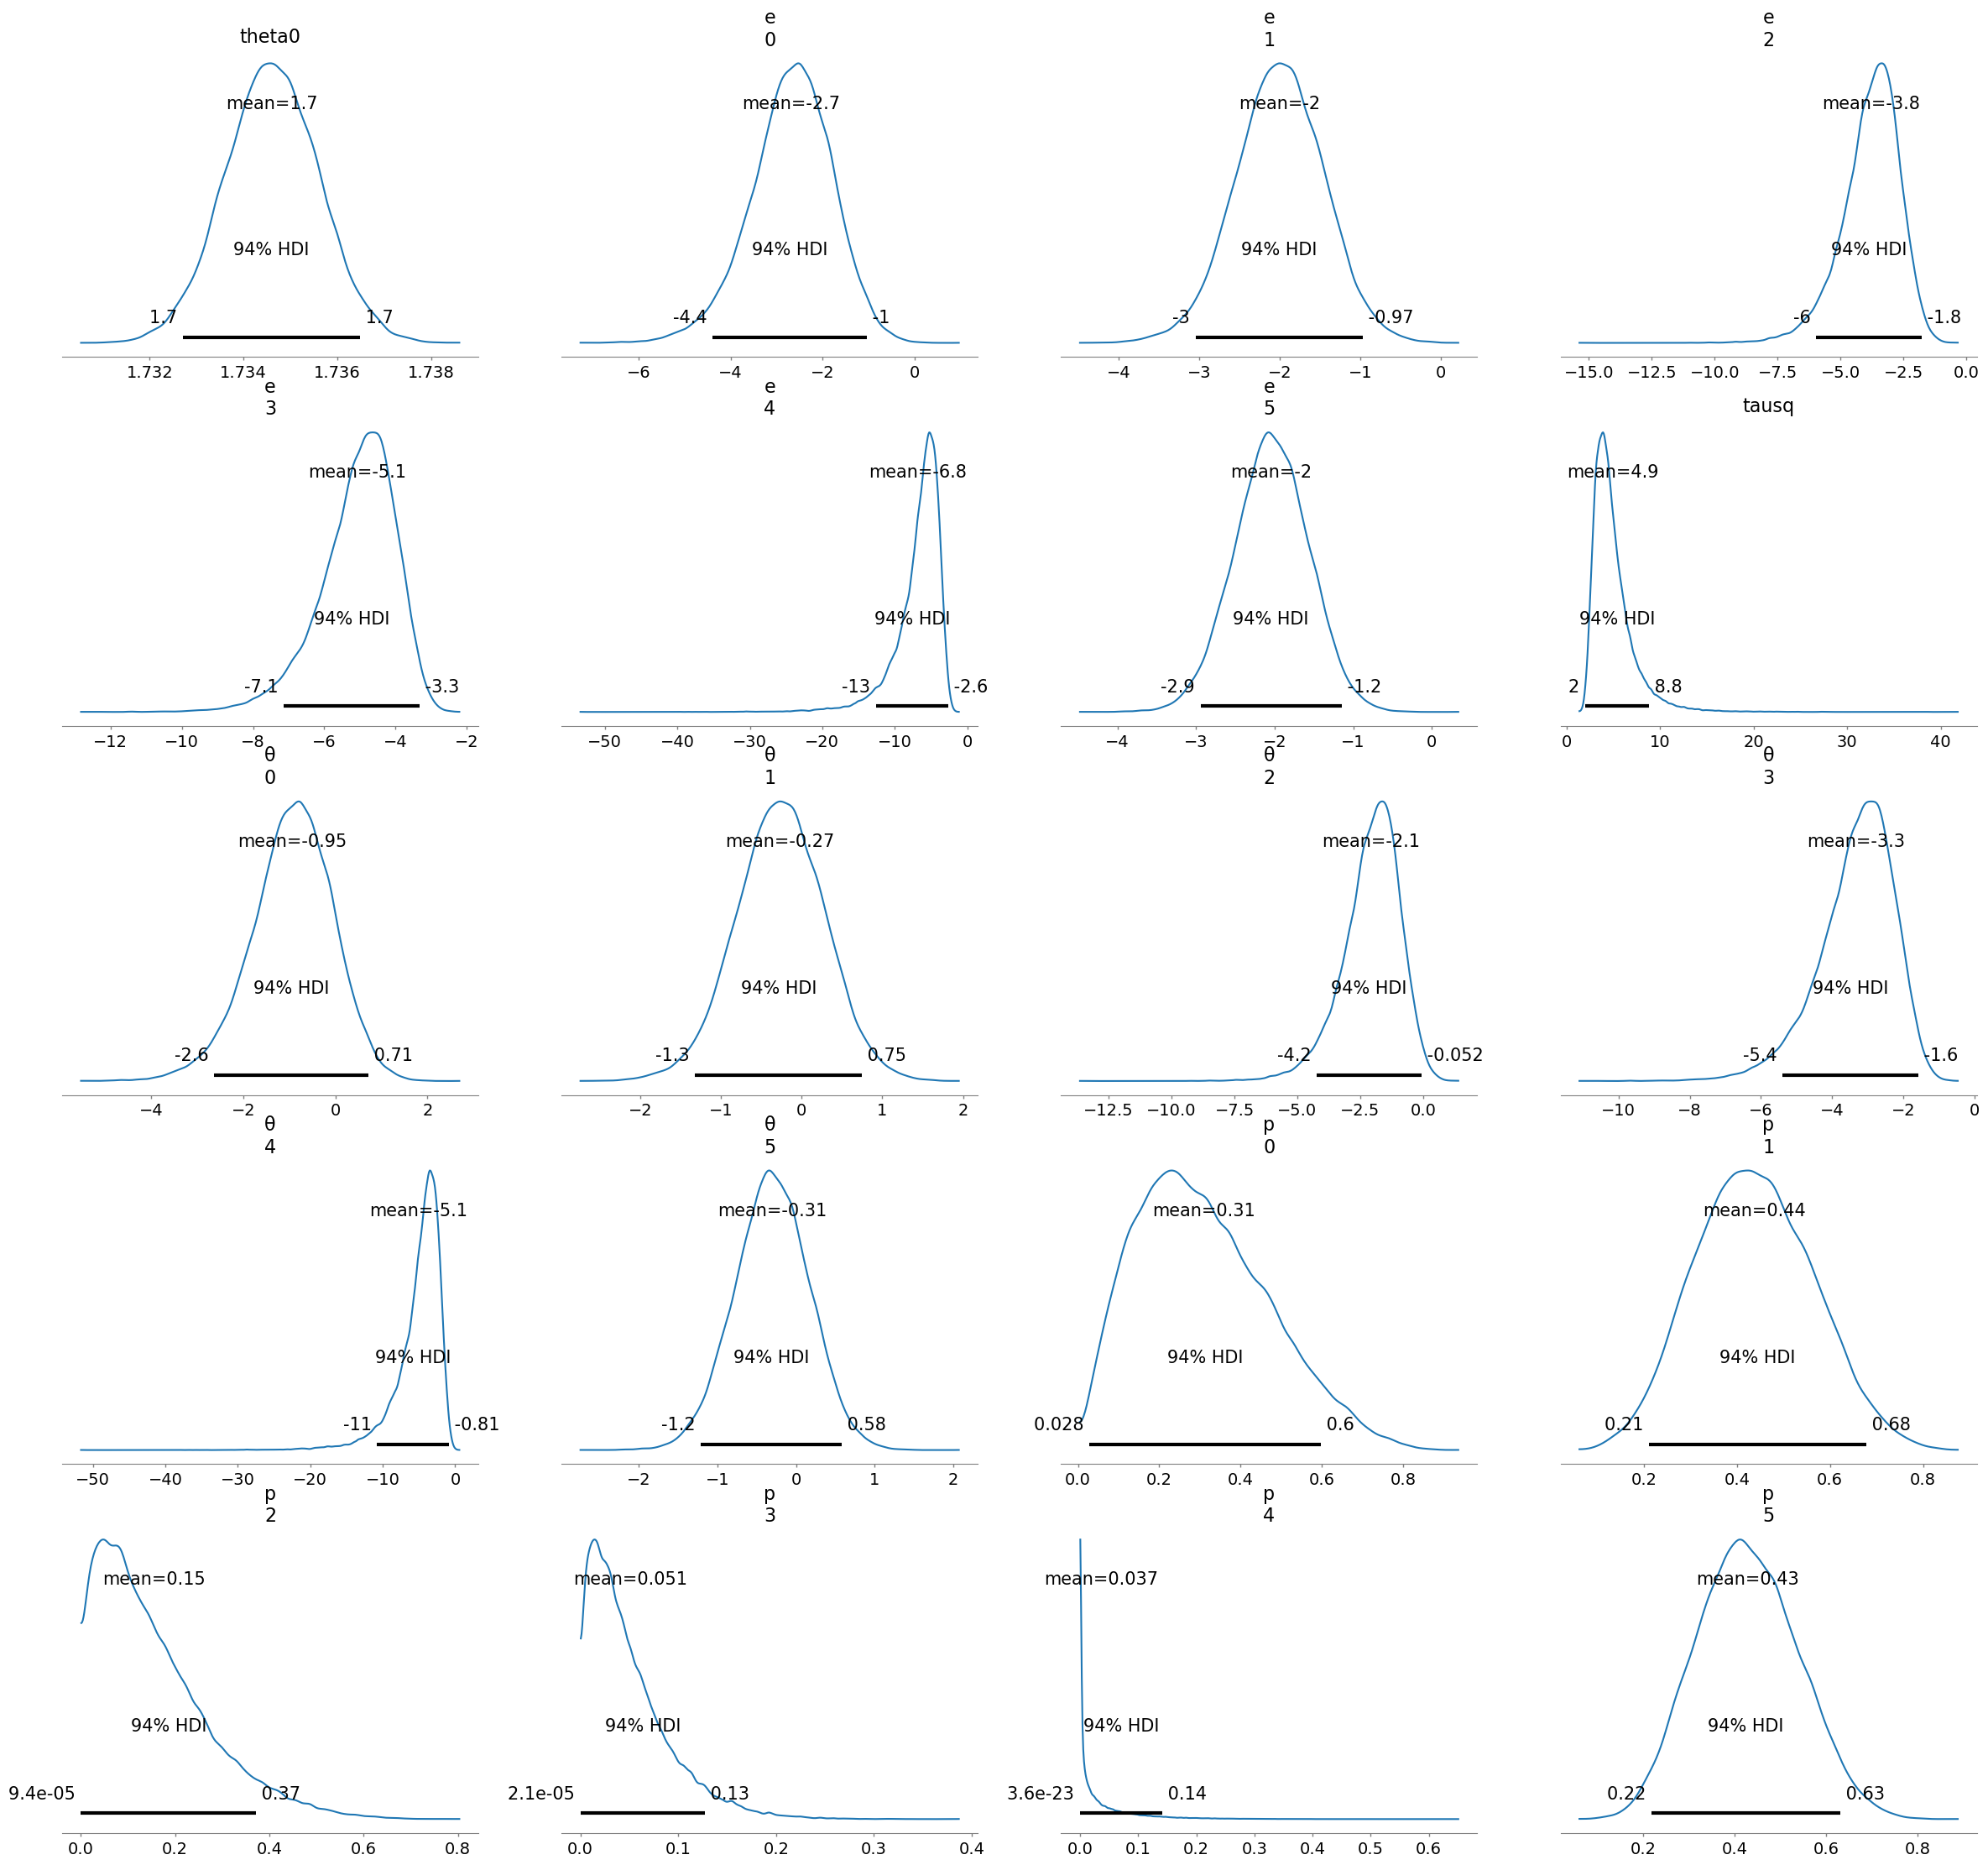

In [31]:
trial.plot_posterior(analysis_name, -1)

In [32]:
trial.final_report(analysis_name)

,status,nnz,total
k,,,
0,COMPLETED_INEFFECTIVE,2,7
1,COMPLETED_EFFECTIVE,6,14
2,COMPLETED_INEFFECTIVE,1,8
3,COMPLETED_INEFFECTIVE,1,26
4,COMPLETED_INEFFECTIVE,0,10
5,COMPLETED_EFFECTIVE,8,19


Same example as in [Berry et al. 2013](https://journals.sagepub.com/doi/full/10.1177/1740774513497539) (Figure 2).

4 groups are present in the group, with first two group responses = 0.10 and the other two groups = 0.3. The trial enrolls patients in 6 stages, first taking 10 patient for each group in the first stage, followed by 5 patients for each group in latter stages.

> The second example is from a scenario in which responses are simulated assuming p = 10% in two groups and p = 30% in two groups. This example illustrates the effect of borrowing, and that the harm is not great, when groups are dissimilar.

### Generate data

In [ ]:
K = 4    # the number of groups
p0 = 0.1 # null response rate
p1 = 0.3 # target response rate

true_response_rates = [p0, p0, p1, p1]
enrollment = [10, 5, 5, 5, 5, 5]

evaluate_interim = [True, True, True, True, True, True] # evaluate every interim stage
analysis_names = ['independent', 'hierarchical', 'bhm']

In [ ]:
futility_cutoff = DEFAULT_FUTILITY_CUTOFF
efficacy_cutoff = DEFAULT_EFFICACY_CUTOFF
early_futility_stop = True
early_efficacy_stop = True

In [ ]:
trial = Trial(K, p0, p1, enrollment, evaluate_interim, 
              num_burn_in, num_posterior_samples, analysis_names, 
              true_response_rates=true_response_rates,
              futility_cutoff=futility_cutoff, efficacy_cutoff=efficacy_cutoff,
              early_futility_stop=early_futility_stop,
              early_efficacy_stop=early_efficacy_stop,              
              num_chains=num_chains)

done = trial.reset()
while not done:
    done = trial.step()

### Check last results

### Independent

In [ ]:
analysis_name = analysis_names[0]
analysis_name

In [ ]:
trial.visualise_model(analysis_name)

In [ ]:
trial.plot_trace(analysis_name, -1)

In [ ]:
trial.plot_posterior(analysis_name, -1)

In [ ]:
trial.final_report(analysis_name)

### Hierarchical

In [ ]:
analysis_name = analysis_names[1]
analysis_name

In [ ]:
trial.visualise_model(analysis_name)

In [ ]:
trial.plot_trace(analysis_name, -1)

In [ ]:
trial.plot_posterior(analysis_name, -1)

In [ ]:
trial.final_report(analysis_name)

### BHM

In [ ]:
analysis_name = analysis_names[2]
analysis_name

In [ ]:
trial.visualise_model(analysis_name)

In [ ]:
trial.plot_trace(analysis_name, -1)

In [ ]:
trial.plot_posterior(analysis_name, -1)

In [ ]:
trial.final_report(analysis_name)